# JEE COllege Predictor using ML

## **<span style="color: #ff3385;">📥 Before we get started! Let's get our Imports</span>**

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Jee admission dataset 2016-2021- darshan.txt")

In [4]:
df.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0,NaN
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0,NaN
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0,NaN
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0,NaN
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0,NaN


In [5]:
df

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0,NaN
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0,NaN
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0,NaN
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0,NaN
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64953,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0,NaN
64954,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0,NaN
64955,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0,NaN
64956,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0,NaN


In [6]:
df.tail()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory,Unnamed: 13
64953,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0,NaN
64954,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0,NaN
64955,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0,NaN
64956,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0,NaN
64957,2021,NIT,1,LA,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,215054,215054,0,NaN


In [7]:
del df["Unnamed: 13"]

del df["Unnamed: 13"]

## **<span style="color:#ff3385;">👀 Exploring the Data</span>**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64958 entries, 0 to 64957
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              64958 non-null  int64 
 1   institute_type    64958 non-null  object
 2   round_no          64958 non-null  int64 
 3   quota             64958 non-null  object
 4   pool              64958 non-null  object
 5   institute_short   64958 non-null  object
 6   program_name      64958 non-null  object
 7   program_duration  64958 non-null  object
 8   degree_short      64958 non-null  object
 9   category          64958 non-null  object
 10  opening_rank      64958 non-null  int64 
 11  closing_rank      64958 non-null  int64 
 12  is_preparatory    64958 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 6.4+ MB


In [9]:
df.describe()

,year,round_no,opening_rank,closing_rank,is_preparatory
count,64958.000000,64958.000000,6.495800e+04,6.495800e+04,64958.000000
mean,2020.421580,2.609348,8.259642e+03,1.070497e+04,0.047631
std,1.149762,2.422558,2.679448e+04,3.788101e+04,0.212985
min,2016.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,2020.000000,1.000000,6.710000e+02,8.320000e+02,0.000000
50%,2021.000000,1.000000,2.309000e+03,2.764500e+03,0.000000
75%,2021.000000,6.000000,6.932000e+03,8.190000e+03,0.000000
max,2021.000000,7.000000,1.082601e+06,1.144790e+06,1.000000


In [10]:
df.shape

(64958, 13)

In [11]:

Columns = pd.DataFrame(df.columns)
Columns

,0
0,year
1,institute_type
2,round_no
3,quota
4,pool
5,institute_short
6,program_name
7,program_duration
8,degree_short
9,category


In [12]:
# Unique values in quota

Quota = pd.DataFrame(df["quota"].unique())
Quota

,0
0,AI
1,HS
2,OS
3,AP
4,GO
5,JK
6,LA


In [13]:
# Unique values in pool

Pool = pd.DataFrame(df["pool"].unique())
Pool

,0
0,Gender-Neutral
1,Female-Only


In [14]:
# Various institutions 

Institutes = pd.DataFrame(df["institute_short"].unique(), columns = {'Institute':0})
Institutes 

,Institute
0,IIT-Bombay
1,IIT-Delhi
2,IIT-Kharagpur
3,IIT-Kanpur
4,IIT-Madras
5,IIT-Roorkee
6,IIT-Guwahati
7,IIT-Indore
8,IIT-Hyderabad
9,IIT-(BHU) Varanasi


In [15]:
# Various types of programs

Programs = pd.DataFrame(df["program_name"].unique(), columns = {'program':0})
Programs

,program
0,Aerospace Engineering
1,Chemical Engineering
2,Chemistry
3,Civil Engineering
4,Computer Science and Engineering
...,...
125,Food Process Engineering
126,Ceramic Engineering and M.Tech Industrial Ceramic
127,Life Science
128,Mathematics and Data Science


In [17]:

#Degree = df.drop(columns=["B.Pharm", "B.Pharm + M.Pharm", "BSc + MSc (IDD)"])


In [18]:
df = df[df["degree_short"].isin(["B.Pharm", "B.Pharm + M.Pharm", "BSc + MSc (IDD)"]) == False]


In [19]:
df = df.drop(index=["B.Pharm", "B.Pharm + M.Pharm", "BSc + MSc (IDD)"], errors="ignore")


In [20]:
#Degree=df.drop(columns=["B.Pharm","B.Pharm + M.Pharm","BSc + MSc (IDD)"])

In [21]:
df

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64953,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,SC,14185,24048,0
64954,2021,NIT,1,JK,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,2736,4171,0
64955,2021,NIT,1,JK,Female-Only,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,ST,10870,10870,0
64956,2021,NIT,1,LA,Gender-Neutral,NIT-Srinagar,Electronics and Communication Engineering,4 Years,B.Tech,GEN,166453,265454,0


In [22]:

df = df[df["degree_short"].isin(["int M.Tech", "B.Pharm"]) == False]


In [23]:
print(df.index)


Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       64948, 64949, 64950, 64951, 64952, 64953, 64954, 64955, 64956, 64957],
      dtype='int64', length=64746)


In [24]:
# Various degrees

Degree = pd.DataFrame(df["degree_short"].unique(), columns = {'Degree':0})
Degree

,Degree
0,B.Tech
1,BSc
2,B.Tech + M.Tech (IDD)
3,Int MSc.
4,B.Arch
5,Int M.Tech
6,BS + MS (IDD)
7,Int Msc.
8,B.Plan
9,Btech + M.Tech (IDD)


In [25]:
# Correcting the values

df.loc[df["degree_short"] == "Int Msc.", "degree_short"] = "Int MSc."

In [26]:
df["degree_short"].nunique()

9

In [27]:
Round = pd.DataFrame(df["round_no"].unique())
Round

,0
0,6
1,7
2,1
3,2


In [28]:
# Unique values in category

Category = pd.DataFrame(df["category"].unique())
Category

,0
0,GEN
1,OBC-NCL
2,SC
3,ST
4,GEN-PWD
5,OBC-NCL-PWD
6,SC-PWD
7,ST-PWD
8,GEN-EWS
9,GEN-EWS-PWD


<Axes: >

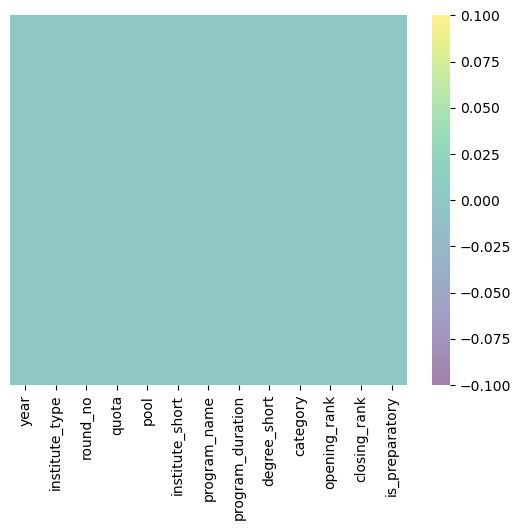

In [29]:
# Checking the null values in dataset

sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis', alpha = 0.5)

In [30]:
# Creating new CSV file After correcting the Dataset

df.to_csv("iit-and-nit-colleges-admission-criteria-version-2.csv")

# **<span style="color:#ff3385;">🥽 Let's see what all we can explore in this dataset</span>**

> 1. What does reservation say about admit to these colleges?

> 2. What is the most optimum Opening and closing rank in overall years?

> 3. Which universities/colleges provide preparatory courses?

> 4. Which category gets most preference for prepratory courses? 

> 5. Institutes and degrees they provide?

> 6. Which institute who provide 4 year and 5 year courses?

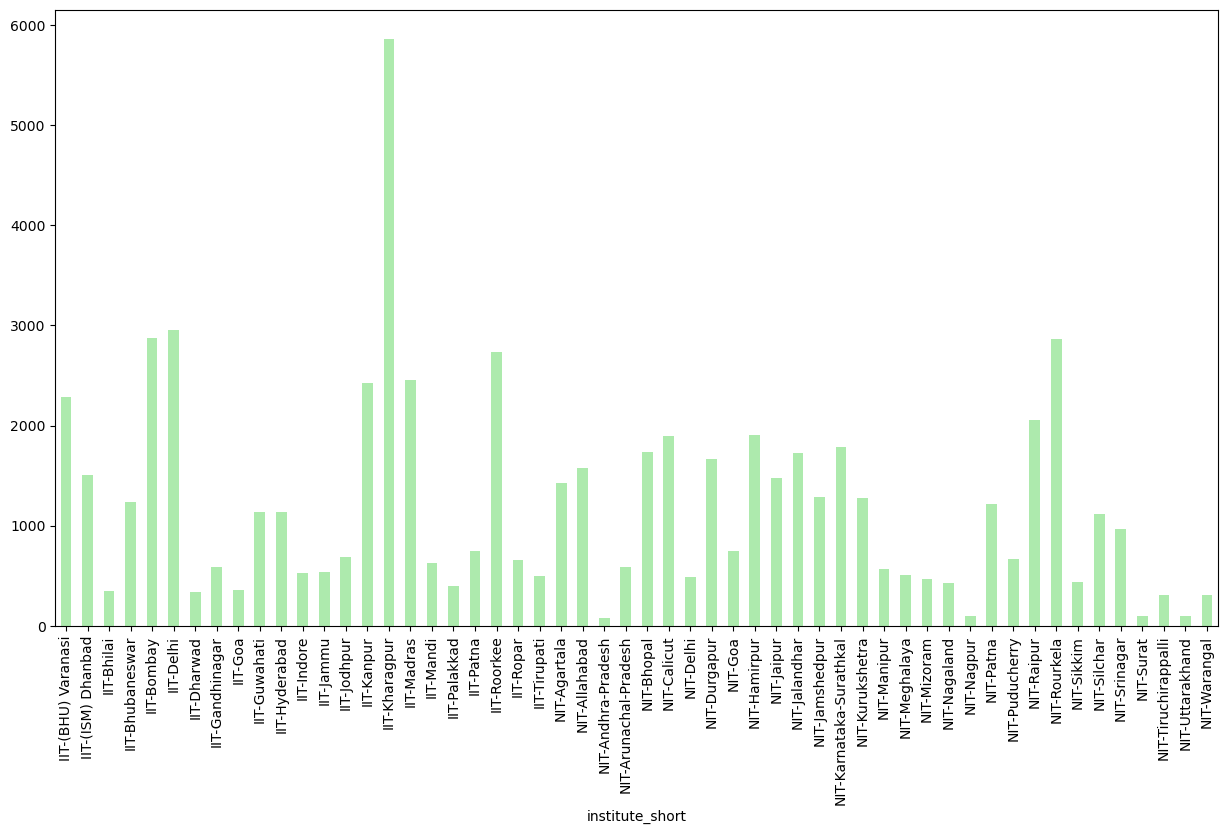

In [31]:
#Let's check out All Institutes in the dataset

plt.figure(figsize=(15,8))
institutes = df.groupby(['institute_short']).size().plot(kind = 'bar', color = "#5cd65c", alpha = 0.5)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'students')

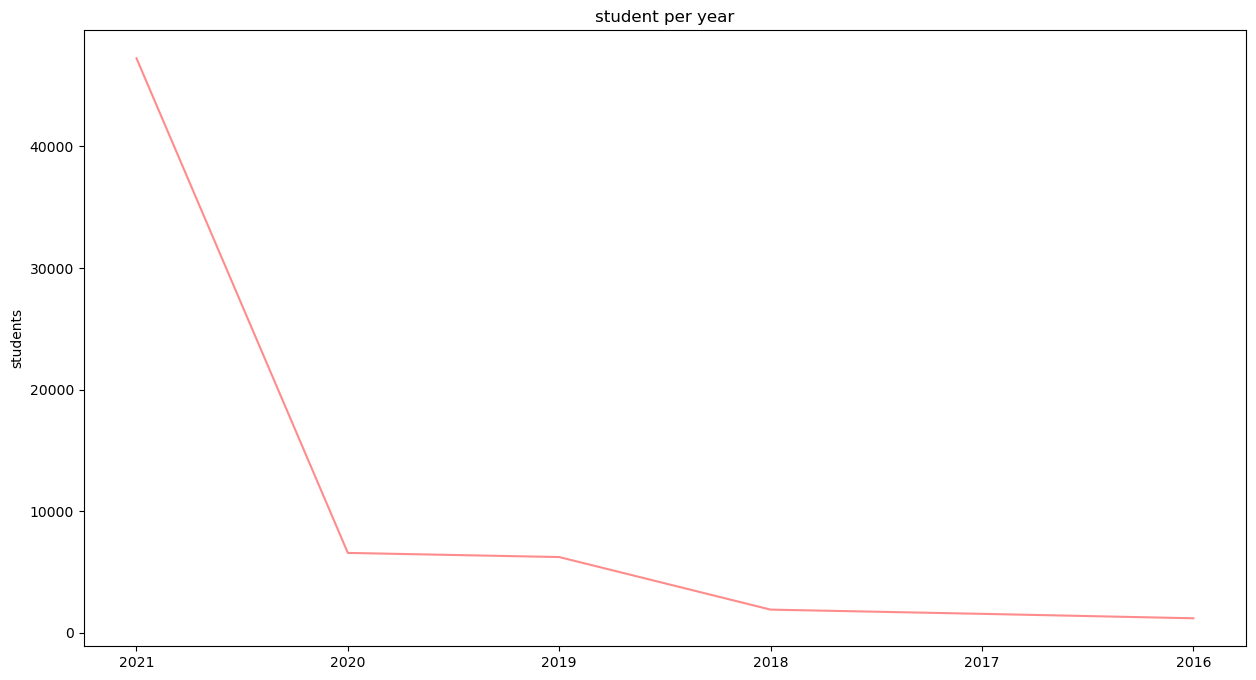

In [32]:
# Students admitted per year

plt.figure(figsize=(15,8))
plt.title('student per year')
sns.lineplot(x=['2021','2020','2019','2018','2017','2016'],y=df['year'].value_counts(), color = "#ff1a1a", alpha = 0.5)
plt.ylabel('students')

## **<span style="color:#ff3385;">1️⃣ What does reservation say about admit to these colleges?</span>**

In [33]:
max_quota = df['quota'].value_counts()
max_quota

quota
AI    32897
OS    16848
HS    14201
JK      393
GO      275
AP       72
LA       60
Name: count, dtype: int64

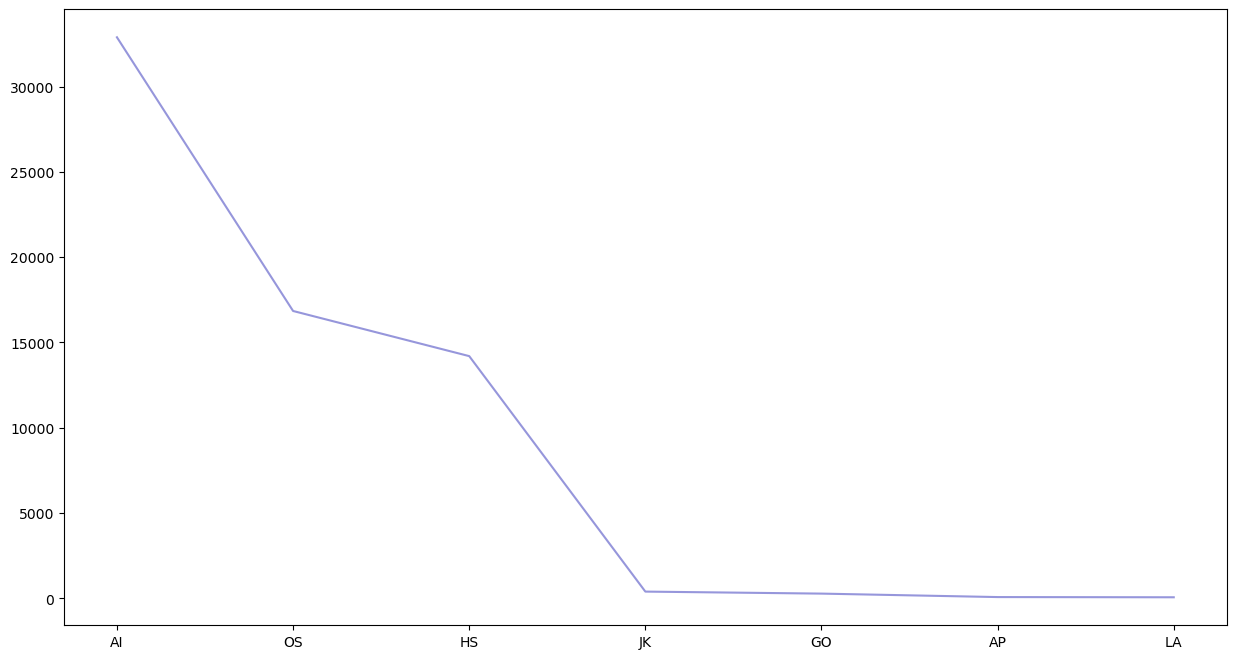

In [34]:
plt.figure(figsize=(15,8))
plt.plot(max_quota, color = "#2e2eb8", alpha = 0.5)
plt.show()

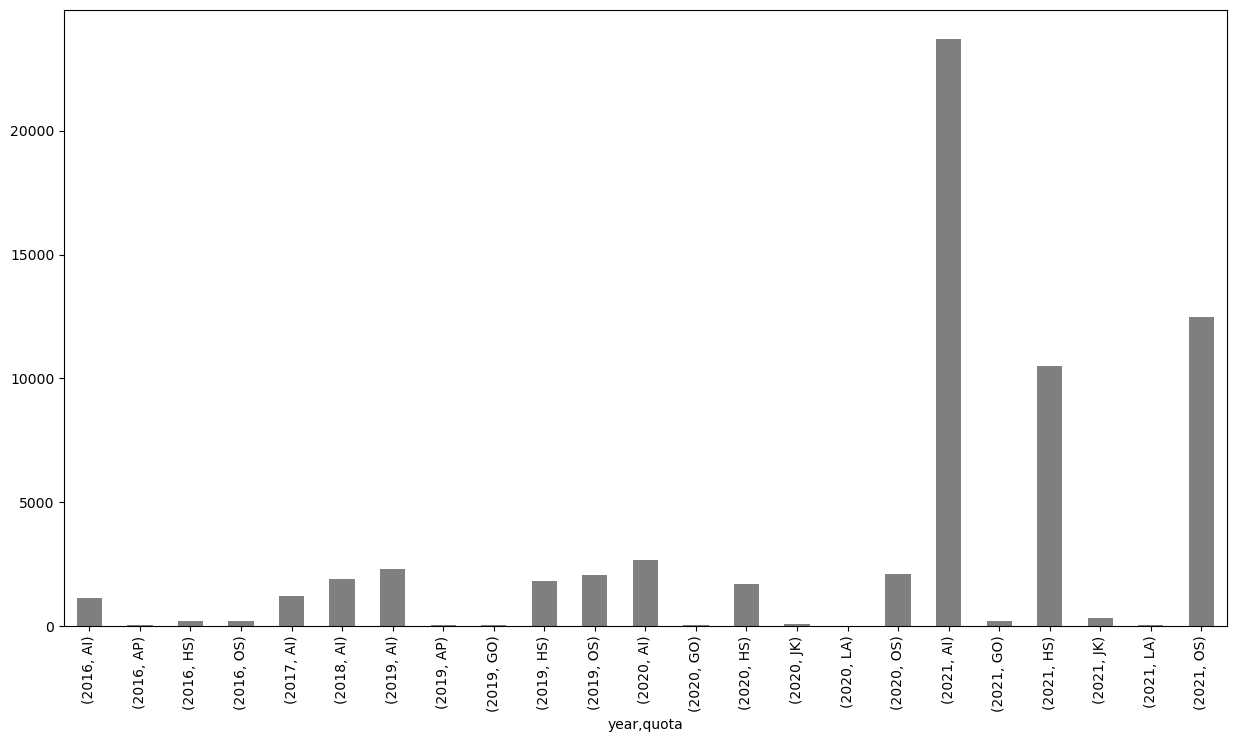

In [35]:
#Yearly quota study

plt.figure(figsize=(15,8))
year_club = df.groupby(['year', 'quota']).size().plot(kind = 'bar', color = "#000000", alpha = 0.5)

**<span style="color:#006600;">From the above plot, we see that AI - all India quota covers maximum number of students followed by OS - Other State and HS - Home State.
While the second plot depicts that AI(All India) quota played an important role from 2016 to 2018.</span>**

## **<span style="color:#ff3385;">2️⃣ What is the most optimum Opening and closing rank in overall years??</span>**

In [36]:
avg_opening_rank = df['opening_rank'].mean(axis = 0)
avg_open_rank = round(avg_opening_rank)
print("Average opening rank over the years has been - ", avg_open_rank)

Average opening rank over the years has been -  8212


In [37]:
max_opening_rank = df['opening_rank'].max(axis = 0)
max_open_rank = round(max_opening_rank)
print("Max opening rank over the years has been - ", max_open_rank)

Max opening rank over the years has been -  1082601


In [38]:
min_opening_rank = df['opening_rank'].min(axis = 0)
min_open_rank = round(min_opening_rank)
print("Min opening rank over the years has been - ", min_open_rank)

Min opening rank over the years has been -  0


In [39]:
avg_closing_rank = round(df['closing_rank'].mean(axis = 0))
print("Average closing rank over the years has been - ", avg_closing_rank)

Average closing rank over the years has been -  10628


In [40]:
max_closing_rank = df['closing_rank'].max(axis = 0)
max_close_rank = round(max_closing_rank)
print("Max closing rank over the years has been - ", max_close_rank)

Max closing rank over the years has been -  1144790


In [41]:
min_closing_rank = df['closing_rank'].min(axis = 0)
min_close_rank = round(min_closing_rank)
print("Min closing rank over the years has been - ", min_close_rank)

Min closing rank over the years has been -  0


**<span style="color:#006600;">From analysis of Opening and Closing ranks, we can say that on average if you score a rank around ~8000 then you might become eligible. While keeping in mind the quota factor, the maximum and minimum ranks still vary on a range of large scale till about 10 lakhs.</span>**

## **<span style="color:#ff3385;">3️⃣  Which universities/colleges provide preparatory courses? </span>**

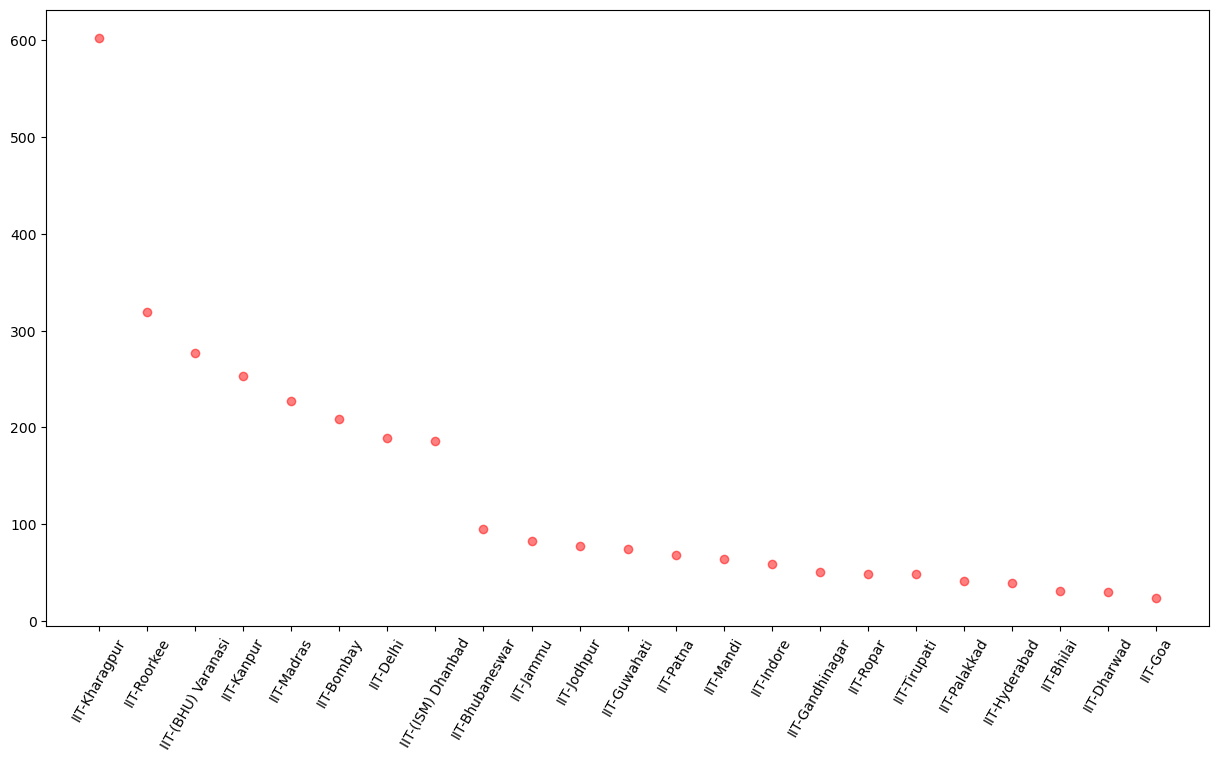

In [42]:
# Which universities/colleges provide preparatory courses (represented by 1)

plt.figure(figsize=(15,8))
prep_true = df.loc[df['is_preparatory'] == 1, 'institute_short'].value_counts()
plt.plot(prep_true, 'o', color = "#ff0000", alpha = 0.5)
plt.xticks(rotation = 60)
plt.show() 

**<span style="color:#006600;"> From the above chart, we found some of the colleges that provide preparatory courses. Here IIT Kharagpur provides maximum number of preparatory courses to students followed by IIT Roorkee and BHU.</span>**

## **<span style="color:#ff3385;">4️⃣ Which category gets most prefrence for prepratory courses?</span>**

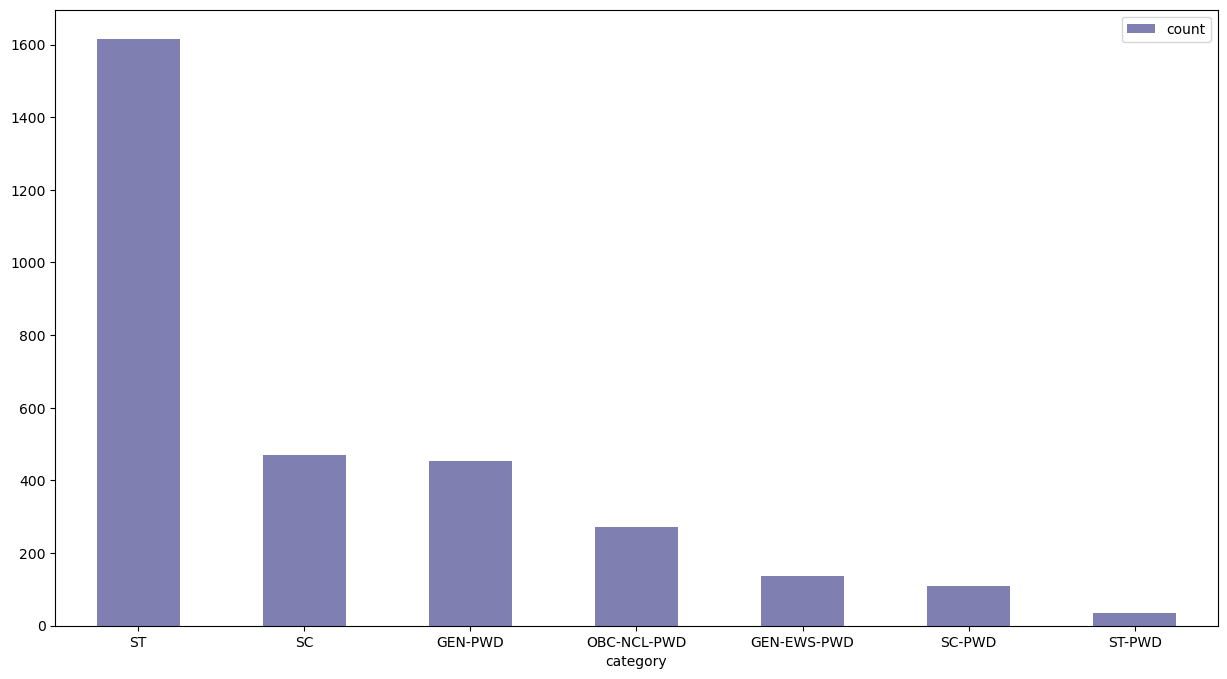

In [43]:
plt.figure(figsize=(15,8))
category_true = df.loc[df['is_preparatory'] == 1, 'category'].value_counts()
category_plot = category_true.plot(kind = 'bar', color = "#000066", alpha = 0.5)

plt.xticks(rotation = 360)
plt.legend()
plt.show()

## **<span style="color:#ff3385;">5️⃣ Institutes and degrees they provide </span>**

Here '**degree_short**' The name of the degree (Abbreviated) and '**institute_short**' is the name of institute (Abbreviated)

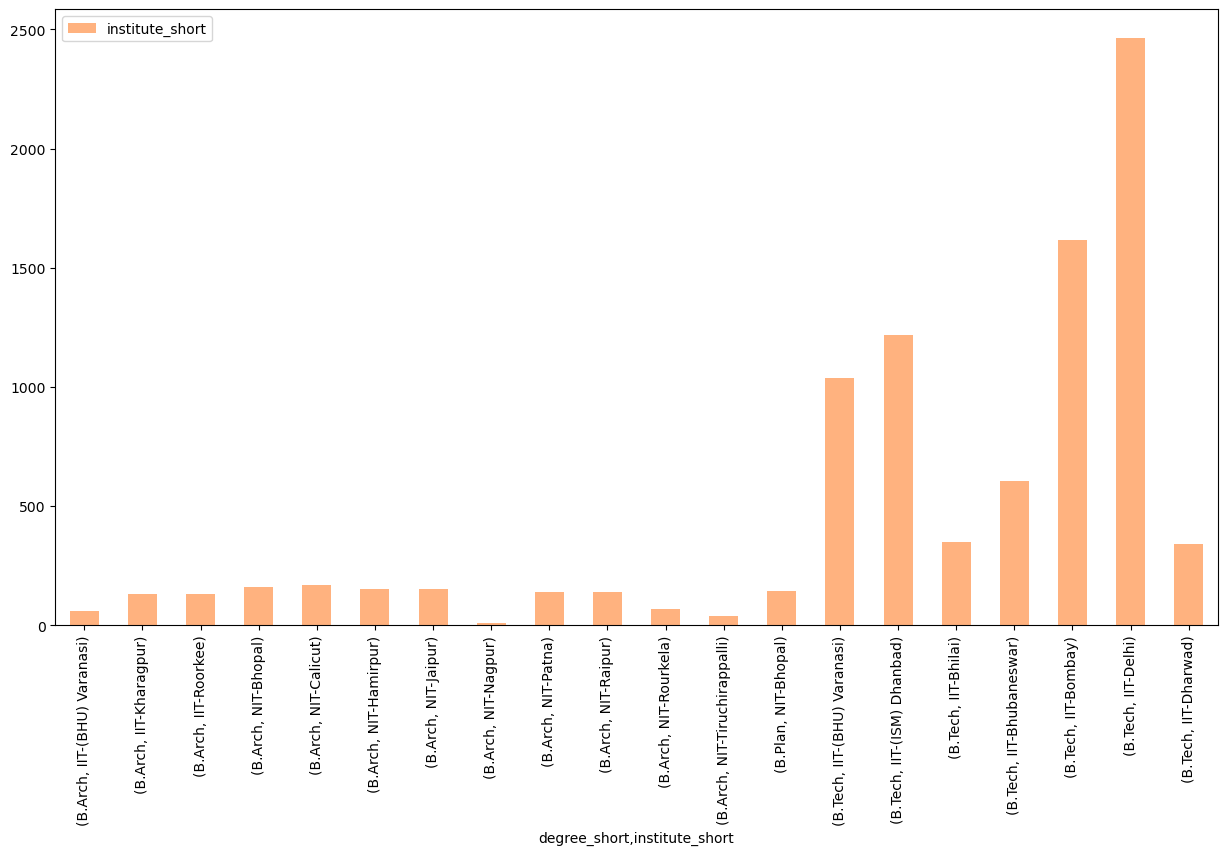

In [44]:
plt.figure(figsize=(15,8))
year_club = df.groupby(['degree_short','institute_short']).institute_short.count().head(20).plot(kind = 'bar',color = "#ff6600", alpha = 0.5)
plt.legend()
plt.show()

**<span style="color:#006600;">As per above bar graph, B.Tech still seems to be the choice of most students when it comes to getting admission in IIT or NITs.</span>**

## **<span style="color:#ff3385;">6️⃣ Institutes who provide 4 year and 5 year courses.</span>**

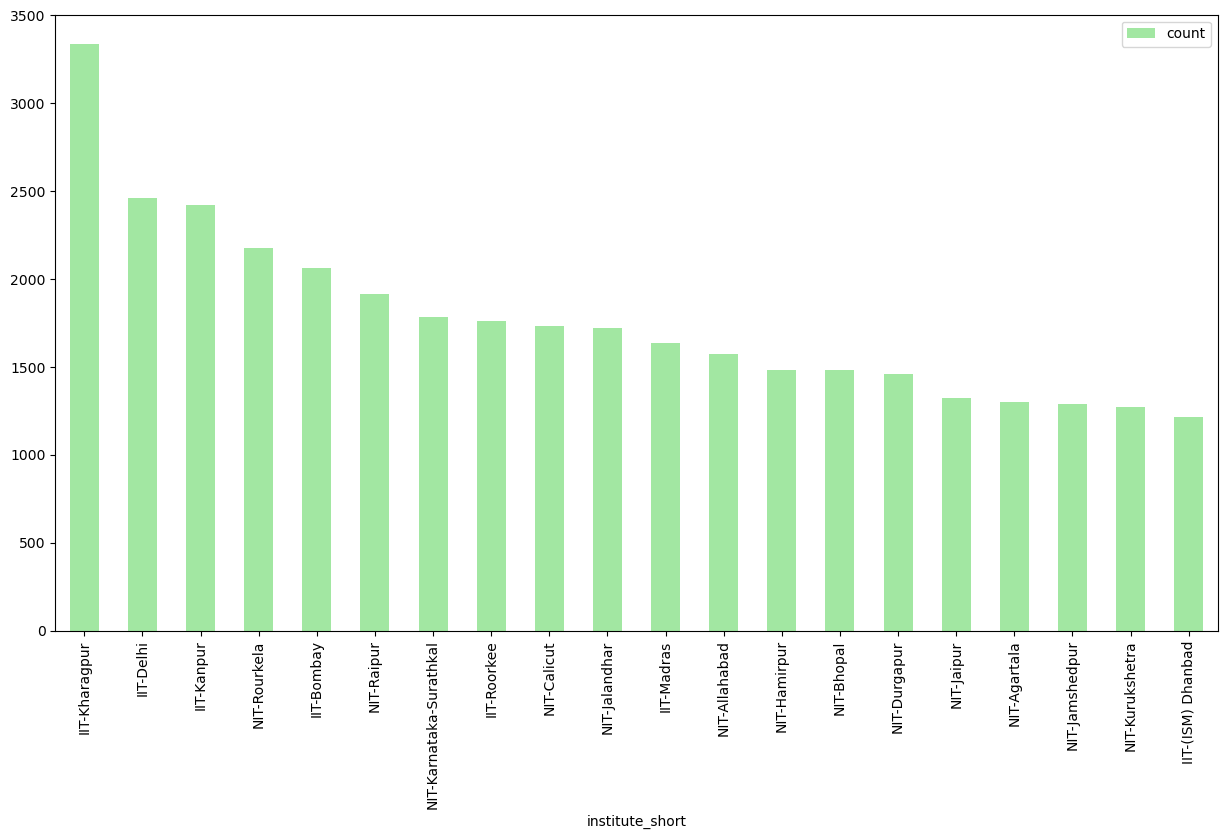

In [45]:
#Institutes with 4 year courses

plt.figure(figsize=(15,8))

years_true = df.loc[df['program_duration'] == '4 Years', 'institute_short'].value_counts().head(20).plot(kind = 'bar',color = "#47d147", alpha = 0.5)

plt.legend()
plt.show()

#we need camprision of 4 and 5 years course

**<span style="color:#006600;">IIT Kharagpur has most 4 years courses to offer followed by IIT-Delhi and IIT-Kanpur.</span>**

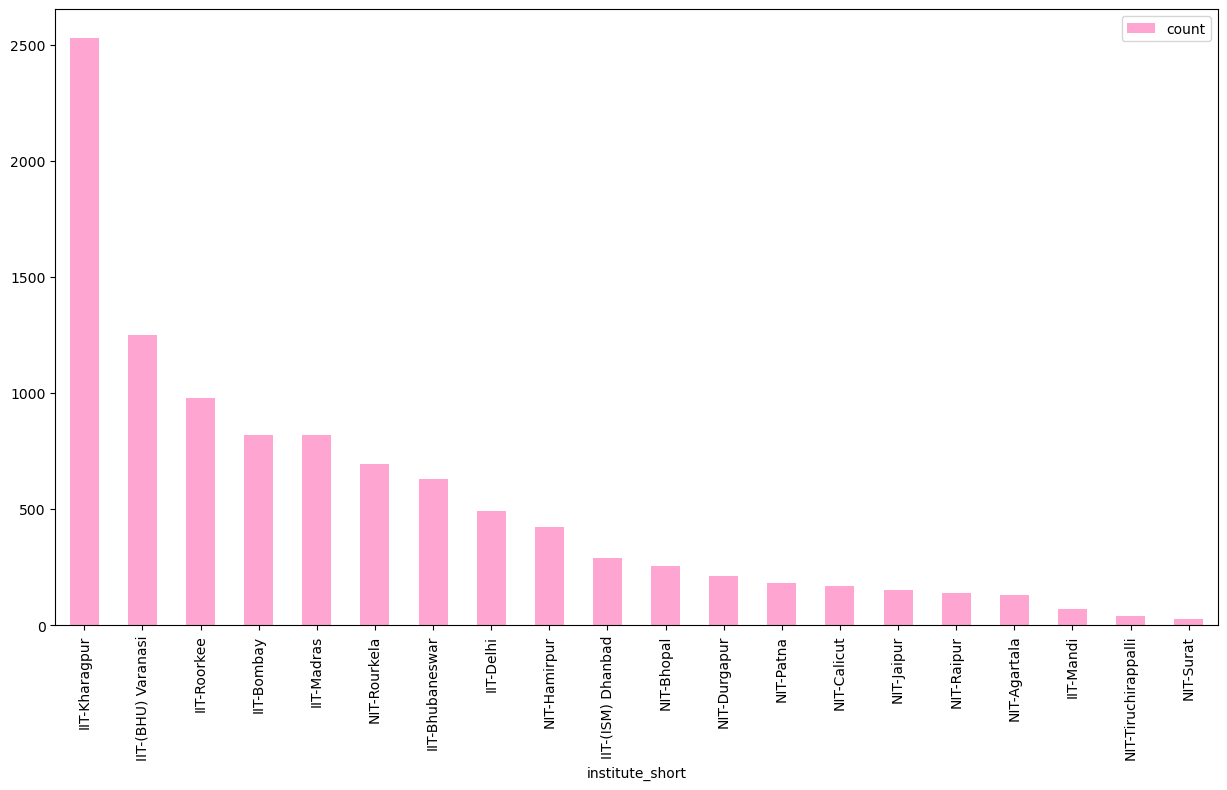

In [46]:
#Institutes with 5 year courses

plt.figure(figsize=(15,8))

years_true = df.loc[df['program_duration'] == '5 Years', 'institute_short'].value_counts().head(20).plot(kind = 'bar',color = "#ff4da6", alpha = 0.5)
plt.legend()
plt.show()

# **<span style="color:#ff3385;">⚔ Evaluation of the model</span>**

Here we evaluate the model and find its error and accuracy rate based on the given feature and target data. We also find out that how the model works when we give it a specific type of data for the prediction.

In [47]:
eval_College = df
eval_College.head()

,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


## **<span style="color:#a300cc;">🔁 Converting object values into numerical form</span>**

**institute_type** - IIT : 0, NIT : 1

**Quota** :-

AI : All-India - 0

HS : Home-State - 3

OS : Other-State - 6

AP : Andhra Pradesh - 1

GO : Goa - 2

JK : Jammu & Kashmir - 4

LA : Ladakh - 5

**Pool** - Gender-Neutral : 0, Female-only : 1

**Category** :-

GEN : General - 0

OBC-NCL : Other Backward Classes-Non Creamy Layer - 4

SC : Scheduled Castes - 6

ST : Scheduled Tribes - 8

GEN-PWD : General & Persons with Disabilities - 3

OBC-NCL-PWD : Other Backward Classes & Persons with Disabilities - 5

SC-PWD : Scheduled Castes & Persons with Disabilities - 7

ST-PWD : Scheduled Tribes & Persons with Disabilities - 9

GEN-EWS : General & Economically Weaker Section - 1

GEN-EWS-PWD : General & Economically Weaker Section & Persons with Disability - 2

In [48]:
# Changing Institute type

eval_College['institute_type'] = [0 if x == 'IIT' else 1 for x in eval_College['institute_type']]
eval_College['institute_type'].unique()

array([0, 1], dtype=int64)

In [49]:
# importing library for encoding

from sklearn.preprocessing import LabelEncoder

In [50]:
# Labeling the quota values

le = LabelEncoder()
eval_College['quota'] = le.fit_transform(eval_College['quota'])
eval_College['quota'].unique()

array([0, 3, 6, 1, 2, 4, 5])

In [51]:
# changing the pool values

eval_College['pool'] = [0 if x == 'Gender-Neutral' else 1 for x in eval_College['pool']]
eval_College['pool'].unique()

array([0, 1], dtype=int64)

In [52]:
# Labeling the categories

eval_College['category']= le.fit_transform(eval_College['category'])
eval_College['category'].unique()

array([0, 4, 6, 8, 3, 5, 7, 9, 1, 2])

In [53]:
# Labeling the Institute values

eval_College['institute_short']= le.fit_transform(eval_College['institute_short'])
eval_College['institute_short'].unique()

array([ 4,  5, 15, 14, 16, 20,  9, 11, 10,  0, 19,  1,  3, 17,  7, 21, 13,
       22,  2,  6,  8, 12, 18, 53, 51, 52, 50, 42, 25, 34, 33, 27, 24, 28,
       23, 29, 30, 31, 32, 39, 36, 43, 41, 44, 45, 47, 26, 35, 37, 38, 40,
       46, 48, 49])

In [54]:
# Labeling the Program Name values

eval_College['program_name']= le.fit_transform(eval_College['program_name'])
eval_College['program_name'].unique()

array([  0,  28,  31,  32,  42,  47,  51,  52,  64,  66,  67,  98, 101,
       107, 108, 109,  14,  24,  48,  95, 125, 128,   1,   2,   4,   7,
        37,  46,  54,  58,  59,  72,  79,  80,  83,  86, 114,  87, 104,
       110, 116, 118, 121, 126,  20,  45,  90,  97,  18,  19,  65, 117,
         6,  13,  57,  74,  75, 123,  29,  61,  68,  91,  15,  17,  26,
        36,  53,  56,  76,  92, 105,   5,  62,  70, 112, 115, 119,  33,
        34,  99, 100, 120,  35,  49, 103, 111,  10,  71, 102, 106,   3,
        60,  81,  88,   8,  16,  44,  11,  55,  50,  69,  89,  21,   9,
        38, 113,  22,  43,  63, 127,  30,  94,  25,  39,  84, 124,  41,
        93,  82,  78, 122,  23,  12,  77,  73,  27,  85,  96,  40])

In [55]:
# Labeling the Degree values

eval_College['degree_short']= le.fit_transform(eval_College['degree_short'])
eval_College['degree_short'].unique()

array([2, 5, 3, 8, 0, 7, 4, 1, 6])

In [56]:
# Target data

y = eval_College[['institute_short', 'degree_short', 'program_name']]

In [57]:
# Featured data

X = eval_College[['category', 'quota', 'pool', 'institute_type', 'round_no',
       'opening_rank', 'closing_rank']]

In [58]:
# Spilliting the data into training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [59]:
# Spilliting the data into training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [60]:
# Regenerating the model once again

model = KNeighborsClassifier()

In [61]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
# Predicting the model again in numerical terms

y_pred = model.predict(X_test)
y_pred

array([[48,  2, 98],
       [20,  2, 32],
       [37,  2, 82],
       ...,
       [49,  2, 32],
       [23,  2, 62],
       [10,  2, 95]])

In [63]:
# Checking the Mean Absolute error of whole model

from sklearn.metrics import mean_absolute_error
print("mean_absolute_error : ", mean_absolute_error(y_pred, y_test))

mean_absolute_error :  4.99907335907336


In [64]:
# Accuracy for Institute short

from sklearn.metrics import classification_report 
y_pred1 = y_pred[:,0]
y_test1 = y_test.loc[:,"institute_short"]
print(classification_report(y_pred1, y_test1))

              precision    recall  f1-score   support

           0       0.65      0.48      0.56       586
           1       0.59      0.49      0.53       357
           2       0.67      0.57      0.61        76
           3       0.69      0.61      0.65       275
           4       0.78      0.71      0.74       608
           5       0.80      0.75      0.77       631
           6       0.63      0.54      0.58        72
           7       0.57      0.63      0.60       115
           8       0.54      0.58      0.56        57
           9       0.63      0.61      0.62       237
          10       0.66      0.70      0.68       238
          11       0.61      0.66      0.64        98
          12       0.66      0.70      0.68       107
          13       0.72      0.71      0.71       136
          14       0.76      0.79      0.77       496
          15       0.78      0.75      0.76      1191
          16       0.73      0.77      0.75       466
          17       0.65    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
mean_absolute_error(y_pred1, y_test1)

4.119150579150579

In [66]:
from sklearn.metrics import accuracy_score
Accuracy1 = accuracy_score(y_pred1, y_test1)
Accuracy1

0.7208494208494208

In [67]:
# Accuracy for Program Name

from sklearn.metrics import classification_report 
y_pred2 = y_pred[:,1]
y_test2 = y_test.loc[:,"degree_short"]
print(classification_report(y_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       225
           1       0.74      0.93      0.82        27
           2       0.97      0.94      0.95     10753
           3       0.69      0.82      0.75       997
           4       0.97      0.85      0.91       151
           5       0.83      0.82      0.83       454
           6       0.75      0.72      0.73       167
           7       0.64      0.81      0.71        93
           8       0.42      0.82      0.56        83

    accuracy                           0.92     12950
   macro avg       0.75      0.84      0.78     12950
weighted avg       0.93      0.92      0.92     12950



In [68]:
mean_absolute_error(y_pred2, y_test2)

0.18934362934362933

In [69]:
from sklearn.metrics import accuracy_score
Accuracy2 = accuracy_score(y_pred2, y_test2)
Accuracy2

0.9196138996138996

In [70]:
# Accuracy for Degree 

from sklearn.metrics import classification_report 
y_pred3 = y_pred[:,2]
y_test3 = y_test.loc[:,"program_name"]
print(classification_report(y_pred3, y_test3))

              precision    recall  f1-score   support

           0       0.72      0.55      0.63       247
           1       0.80      0.59      0.68        34
           2       0.88      0.64      0.74        33
           3       0.00      0.00      0.00         3
           4       0.78      0.48      0.59        61
           5       0.60      0.43      0.50        21
           6       0.00      0.00      0.00         2
           7       0.74      0.62      0.67       301
           8       0.85      0.69      0.76        48
           9       0.88      0.62      0.73        24
          10       0.85      0.63      0.72        35
          11       0.65      0.56      0.60        36
          12       0.66      0.52      0.58        52
          13       0.65      0.60      0.62       202
          14       0.00      0.00      0.00         3
          15       0.50      0.64      0.56        11
          16       0.00      0.00      0.00         1
          17       0.68    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [71]:
mean_absolute_error(y_pred3, y_test3)

10.688725868725868

In [72]:
from sklearn.metrics import accuracy_score
Accuracy3 = accuracy_score(y_pred3, y_test3)
Accuracy3

0.7272586872586873

In [73]:
# total accuracy of the model

Mean_Accuracy = (Accuracy1 + Accuracy2 + Accuracy3) / 3
Mean_Accuracy

0.7892406692406692

**<span style="color:#006600;">Here we evaluate our model and find that it is really good and a realistic model. Firstly, we extract the individual Accuracy of the target data and then conclude the mean accuracy of the target data. </span>**

**<span style="color:#fffff;">Accuracy of Institute Name - 75.3%</span>**

**<span style="color:#fffff;">Accuracy of Program Name - 75.6%</span>**

**<span style="color:#fffff;">Accuracy of degree - 93.8%</span>**

**<span style="color:#006600;">After calculating the individual accuracy, we will find out the total or mean accuracy of the model.</span>**

**<span style="color:#fffff;">Accuracy of the Model - 81.6%</span>**

***

## **<span style="color:#ff3385;">🔮 Prediction of Colleges</span>**

The Colleges are predicted by the given featured dataset in which feature like Institute type, Round Number, Quota, Category, Opening Rank and Closing Rank is calculated to find the College, Branch and Degree.

In [74]:
pred_College = pd.read_csv("iit-and-nit-colleges-admission-criteria-version-2.csv")
pred_College.head()

,Unnamed: 0,year,institute_type,round_no,quota,pool,institute_short,program_name,program_duration,degree_short,category,opening_rank,closing_rank,is_preparatory
0,0,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN,838,1841,0
1,1,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,OBC-NCL,408,1098,0
2,2,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,SC,297,468,0
3,3,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,ST,79,145,0
4,4,2016,IIT,6,AI,Gender-Neutral,IIT-Bombay,Aerospace Engineering,4 Years,B.Tech,GEN-PWD,94,94,0


## **<span style="color:#a300cc;">🔁 Converting object values into numerical form</span>**

**institute_type** - IIT : 0, NIT : 1

**Quota** :-

AI : All-India - 0

HS : Home-State - 3

OS : Other-State - 6

AP : Andhra Pradesh - 1

GO : Goa - 2

JK : Jammu & Kashmir - 4

LA : Ladakh - 5

**Pool** - Gender-Neutral : 0, Female-only : 1

**Category** :-

GEN : General - 0

OBC-NCL : Other Backward Classes-Non Creamy Layer - 4

SC : Scheduled Castes - 6

ST : Scheduled Tribes - 8

GEN-PWD : General & Persons with Disabilities - 3

OBC-NCL-PWD : Other Backward Classes & Persons with Disabilities - 5

SC-PWD : Scheduled Castes & Persons with Disabilities - 7

ST-PWD : Scheduled Tribes & Persons with Disabilities - 9

GEN-EWS : General & Economically Weaker Section - 1

GEN-EWS-PWD : General & Economically Weaker Section & Persons with Disability - 2

In [75]:
# Changing Institute type

pred_College['institute_type'] = [0 if x == 'IIT' else 1 for x in pred_College['institute_type']]
pred_College['institute_type'].unique()

array([0, 1], dtype=int64)

In [76]:
# Labeling the quota values

le = LabelEncoder()
pred_College['quota'] = le.fit_transform(pred_College['quota'])
pred_College['quota'].unique()

array([0, 3, 6, 1, 2, 4, 5])

In [77]:
# changing the pool values

pred_College['pool'] = [0 if x == 'Gender-Neutral' else 1 for x in pred_College['pool']]
pred_College['pool'].unique()

array([0, 1], dtype=int64)

In [78]:
# Labeling the categories

pred_College['category']= le.fit_transform(pred_College['category'])
pred_College['category'].unique()

array([0, 4, 6, 8, 3, 5, 7, 9, 1, 2])

In [79]:
# Selecting the target data

y1 = pred_College[['institute_short', 'degree_short', 'program_name']]

In [80]:
# Selecting the featured data

X1 = pred_College[['category', 'quota', 'pool', 'institute_type', 'round_no',
       'opening_rank', 'closing_rank']]

## **<span style="color:#ff3385;">💔 Splitting the training and testing data </span>**

In [81]:
# Spilliting the data into training and testing dataset

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8)

In [82]:
a1 = np.array([X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape], dtype = 'object')
a1

array([[51796, 7],
       [12950, 7],
       [51796, 3],
       [12950, 3]], dtype=object)

In [83]:
# Importing library for mdoel generation

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [84]:
# Importing library for mdoel generation

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [85]:
model1.fit(X1_train, y1_train)

KNeighborsClassifier()

In [86]:
# predicting the dataset

y_pred1 = model1.predict(X1_test)
y_pred1

array([['NIT-Allahabad', 'B.Tech', 'Civil Engineering'],
       ['NIT-Allahabad', 'B.Tech', 'Computer Science and Engineering'],
       ['NIT-Rourkela', 'B.Tech', 'Mining Engineering'],
       ...,
       ['IIT-Bombay', 'B.Tech', 'Aerospace Engineering'],
       ['IIT-Jammu', 'B.Tech', 'Computer Science and Engineering'],
       ['NIT-Jalandhar', 'B.Tech', 'Civil Engineering']], dtype=object)

In [87]:
# prediction

Prediction1 = pd.DataFrame(model1.predict([[0, 0, 0, 1, 6, 1000, 2841], [5, 5, 1, 0, 2, 1000, 1841]]), columns = [['College', 'Branch', 'Degree']])
Prediction1
# Prediction1 = model1.predict([[0, 1, 10, 10, 10, 5000, 2841]])
# print(Prediction1)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,College,Branch,Degree
0,IIT-Delhi,B.Tech,Chemical Engineering
1,IIT-Hyderabad,B.Tech,Mechanical Engineering


# **<span style="color:#ff3385;">📲 Pickling the model for the deployment</span>**

In [88]:
import pickle

In [89]:
pickle.dump(model1, open("model1.pkl", "wb"))

In [90]:
loaded_model = pickle.load(open("model1.pkl", 'rb'))
result = loaded_model.predict([[1, 1, 10, 10, 10, 5000, 2841]])
print(result)

[['NIT-Rourkela' 'Int MSc.' 'Mathematics']]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [91]:
result = loaded_model.predict([[0, 6, 0, 0, 0, 1000, 2841]])
print(result)

[['IIT-Delhi' 'B.Tech' 'Chemical Engineering']]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# **<span style="color:#ff3385;">🤘 Conclusion</span>**
It Help to take admission for student
***